# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-02 17:37:55.047905: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 17:37:55.051491: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 17:37:55.083632: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 17:37:55.762227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia


🌄 Graia v0.0.1

Graia initializing…
Graia ready.



In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=16, layers=2, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

Graia model with 12960 random parameters instantiated.


Epoch 1/1: accuracy 100.000%

 [[ 7 -8  7  2  4  4 -2 -7  2  5  8 -7 -3 -5 -4  3]
 [ 4 -8  3  6 -1 -4 -2 -4 -7 -4 -4 -3  6 -5 -8 -3]
 [ 4 -3 -4 -6  7 -4 -1  1 -8 -1 -3  3 -3 -6  3  3]
 [-4  8  6  4 -5 -3  5  8 -6  1 -7 -7  3  8 -8  6]
 [ 1 -3 -4  2  5 -2 -4 -8  1  1  2  7  6 -4 -2  1]
 [-7  5  3 -6 -2 -1  8 -5  8  6 -5 -3 -7 -6 -3 -3]
 [-2  3 -5  2 -6 -8  6  5  1  4 -4  3  4  6  3 -6]
 [-3  5 -1  1 -6  6 -8 -6  8  7  1 -5  6  7 -2 -6]
 [-4 -8 -8 -2 -7 -2  2 -8  1  8 -2 -4  6  8 -7  2]
 [-5 -6 -5  7  5 -2  7 -8  4  8 -1  1  2 -4 -7  5]
 [ 1 -5  4 -6 -7 -2  3  7 -6 -2 -3 -8  4 -2  6  6]
 [-5  6  5 -7  4 -7 -1 -1 -3 -4 -5 -5 -3 -3 -7 -3]
 [-1  1 -1 -5  7  8  2 -8  1 -2 -4  6 -4 -2 -6  1]
 [ 3 -8 -1 -2  5 -2 -3 -2 -6 -1  8  1 -3  6  6 -3]
 [-3 -7  4  1  8  2  3 -8  6  8  4  1 -3 -1  1 -7]
 [-5  5 -7 -6 -8  4 -6  3  6  4 -1  1 -6 -7 -5 -3]]

 [0 1 0 0 2 3 0 0 2 1]


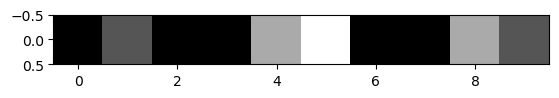

In [15]:
model.fit(train_images, train_labels, epochs=1)
# plt.imshow(model.hidden_weights[0])
# print("\n", model.input_weights[0][:16])
print("\n", model.hidden_weights[0])
# print("\n", model.output_weights)
print("\n", model.last_outputs)
plt.imshow([model.last_outputs], cmap="gray")